# Lab Six - Space Weather 

## *Solar Impacts on Geomagnetic Storms*


You will learn how to: 

- Perform linear regression and error analysis (part two).
- Share an x-axis on plots.
- Utilize the Pearson linear correlation coefficent (association). 
- Find the uncertainty in association using Bootstrap.
- Explore different plotting styles.

By the end of this lab you should be able to: analyze linear dependencies and calculate their uncertainty. 

Additional materials for reading: Igual & Seguí, Chapter 5 & 6

## Part A: Brief Introduction to Space Weather




### What IS space weather? 

"Space-weather events are naturally occurring phenomena that have the potential to disrupt electric power systems; satellite, aircraft, and spacecraft operations; telecommunications; position, navigation, and timing services; and other technologies and infrastructures..." Source - [National Space Weather Action Plan](https://obamawhitehouse.archives.gov/sites/default/files/microsites/ostp/final_nationalspaceweatheractionplan_20151028.pdf)

"Space weather refers to the environmental conditions in Earth's magnetosphere (e.g. magnetic environment), ionosphere and thermosphere (e.g. upper atmosphere) due to the Sun and the solar wind that can influence the functioning and reliability of spaceborne and ground-based systems and services or endanger property or human health." Source - [European Space Agency](http://swe.ssa.esa.int/what-is-space-weather)

In this lesson we learn about space weather and how the Sun - through the solar surface, magnetic fields, and particles - impacts the environment around Earth. A commonly known phenomena as a part of space weather is the aurora. 

<img src="./Images/AuroraNASA_Earth.jpg" alt="Drawing1" width="400px"/><img src="./Images/AuroraNASA.jpg" alt="Drawing2" width="400px"/>

Sources: [NASA](https://www.nasa.gov/mission_pages/sunearth/news/gallery/HugoLAchre-20121010.html) & [NASA](https://www.nasa.gov/image-feature/aurora-and-the-pacific-northwest) 



<img src="./Images/SpaceWeatherNOAA.jpg" alt="SpaceWeatherInfographic" width="800px"/>

Source: [NOAA](http://www.noaa.gov/explainers/space-weather-storms-from-sun)

----

## Part B: Space Weather Impacts on Earth

Go to your images folder and open ./Example_GeoSpaceWeather.mp4 

Here we see a solar event (magnetic field and particles) impacting the Earth's magnetosphere (magnetic environment) resulting in aurora. Let's watch this together. 

Source: [NASA](https://svs.gsfc.nasa.gov/20097)


## *Part B.1 - Looking at Solar Dynamic Observatory (SDO) Data and Solar Wind Data*

The Sun is dynamic, at certain periods in time it can be either more active (solar maximum), or less active (solar minimum). SDO has been taking images and other data of the Sun since ~ 2010.

These data are from https://sdo.gsfc.nasa.gov/



### Please explore under ./Data/ the videos of the Sun under QuietTime and ActiveTime subfolders. Compare the same colors to each other, what do we observe? Work with your neighbor for 2 minutes to review these videos and come up with one observation. 
 
 -
 
 -
 
 -
 
 ### Part B.2 Let's now take a look and see what these solar images can tell us.

In [1]:
#import required packages for this lab.

import numpy as np                              #for accuracy 
import datetime as dt                           #for datetime objects
import matplotlib.pyplot as plt                 #for pretty plotting
import pandas as pd                             #for data structures
from scipy import stats                         #for linear regression
import matplotlib.dates as mdt                  #for manipulation of dates in matplotlib
from matplotlib.ticker import MultipleLocator   #for pretty plotting
import matplotlib.image as mpimg                #for manipulation of img files
                                                #in plotting environments
import importlib                                #for reimporting libaries / package
import linerror as lr                           #same as Lab6 - for calculating linear
                                                #fits
        
from matplotlib.patches import Rectangle        #NEW IN THIS LAB
                                                #for plotting rectangles
    
import omni_data_functions as omni_fn           #NEW IN THIS LAB
                                                #for easy importing
    
from sklearn.metrics import confusion_matrix    #NEW IN THIS LAB
                                                #for confusion matrix
                                                #note sklearn is an extensive 
                                                #package with a lot of functionality
                                                #particularly for machine learning
                                                #and high end data analytics
#for plotting in notebook
%matplotlib inline

### We will start with something simple - let's plot the solar data we saw from SDO as an image.


In [2]:
# Read in image files.
quiet_sun = mpimg.imread('./Data/SolarMinImages/20180105_022906_512_0304.jpg')
active_sun = mpimg.imread('./Data/SolarMaxImages/20130317_044532_512_0304.jpg')


#### Create a 1x2 matplotlib plot with solar data.

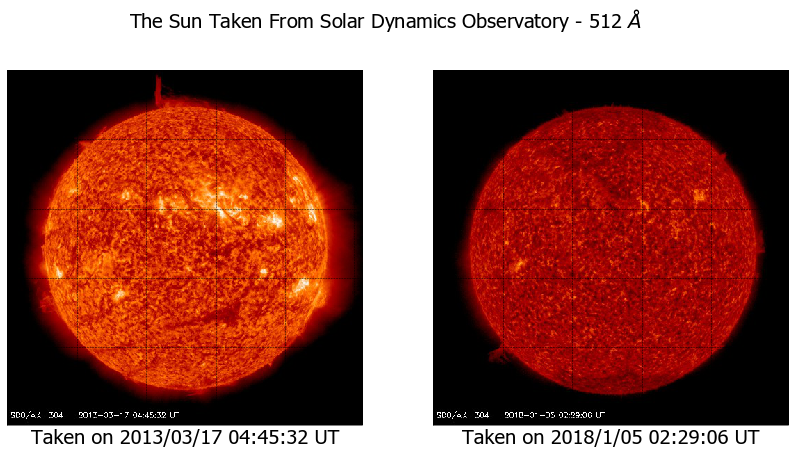

In [3]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle('The Sun Taken From Solar Dynamics Observatory - 512 $\AA$', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(active_sun)
ax2.imshow(quiet_sun)

#setting labeling
ax1.set_xlabel('Taken on 2013/03/17 04:45:32 UT',   fontsize = 20)
ax2.set_xlabel('Taken on 2018/1/05 02:29:06 UT', fontsize = 20)

# Removing ticks and tick labels.
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

 ### Part B.3 Reviewing Near-Earth Data at These Times
 
We have near-Earth data from the space environment at these same times. This data is from the OMNI site - https://omniweb.gsfc.nasa.gov/html/ow_data.html#1

"primarily a 1963-to-current compilation of hourly-averaged, near-Earth solar 
wind magnetic field and plasma parameter data from several spacecraft in geocentric or 
L1 (Lagrange point) orbits. The data have been extensively cross compared, and, 
for some spacecraft and parameters, cross-normalized. Time-shifts of higher 
resolution data to expected magnetosphere-arrival times are done for data from 
spacecraft in L1 orbits (ISEE 3, Wind, ACE), prior to taking hourly averages."

**Let's read this in now.**

In [4]:
column_names = ['YEAR', 'DOY', 'Hour', 'BX', 'BY', 'BZ', 'FlowPressure', 'Ey', 'Kp', 
            'SunspotNumber', 'Dst', 'f10.7_index']

hour_omni = pd.read_csv('./Data/omni2_Hourly1980_2018.lst', sep = '\s+', names = column_names,
                          parse_dates = {'Datetime': column_names[0:3]}, keep_date_col = 'True')

hour_omni.index = pd.to_datetime(hour_omni['Datetime'], infer_datetime_format = False, 
                                   format = '%Y %j %H')



### Activity for you! Look at the first two rows of hour_omni and the last row - what do we notice?


In [15]:
#Enter your Code Here
hour_omni.head(2)

,Datetime,YEAR,DOY,Hour,BX,BY,BZ,FlowPressure,Ey,Kp,SunspotNumber,Dst,f10.7_index
Datetime,,,,,,,,,,,,,
1980-01-01 00:00:00,1980 1 0,1980,1,0,-5.3,5.2,3.4,1.43,-1.89,23,217,-27,189.1
1980-01-01 01:00:00,1980 1 1,1980,1,1,-6.3,4.6,2.5,1.66,-1.41,23,217,-20,189.1


In [14]:
hour_omni.tail(1)

,Datetime,YEAR,DOY,Hour,BX,BY,BZ,FlowPressure,Ey,Kp,SunspotNumber,Dst,f10.7_index
Datetime,,,,,,,,,,,,,
2018-02-26 23:00:00,2018 57 23,2018,57,23,999.9,999.9,999.9,99.99,999.99,99,999,8,68.4


-

-

-

-

-

-

-

-

-

-

-


Let's fix these missing values in our dataset. Missing values are 9's in whatever format is specified in the read me from
the data site. Because the data has different format - we replace the similarly formatter columns with each of the retrospective nan values.

In [16]:
hour_omni[['BX', 'BY', 'BZ', 'f10.7_index']] = hour_omni[[
    'BX', 'BY', 'BZ', 'f10.7_index']].replace(to_replace = 999.9, value = np.nan)

hour_omni['FlowPressure'] = hour_omni['FlowPressure'].replace(
    to_replace = 99.99, value = np.nan)

hour_omni['Ey'] = hour_omni['Ey'].replace(to_replace = 999.99, value = np.nan)

hour_omni[['SunspotNumber', 'Kp']] = hour_omni[['SunspotNumber', 'Kp']].replace(
    to_replace = 999, value = np.nan)


### Now that we've cleaned our data, let's compare the active and non-active times we were looking at before.

In [17]:
# Define start and stop dates of active and non-active times.

startdate_active = dt.datetime(2013, 3, 15)
stopdate_active  = dt.datetime(2013, 3, 20)

idx_active =  (hour_omni.index > startdate_active) & (hour_omni.index < stopdate_active)

# Similar for quiet solar times.
startdate_quiet  = dt.datetime(2018, 1, 3)
stopdate_quiet   = dt.datetime(2018, 1, 8)

idx_quiet = (hour_omni.index > startdate_quiet) & (hour_omni.index < stopdate_quiet)





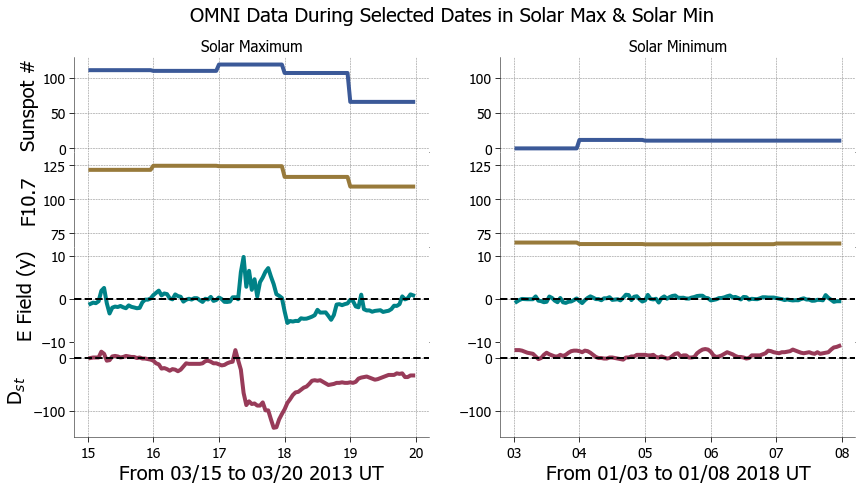

In [18]:
#and now let's make our plot
fig = plt.figure(figsize=(14, 7))
fig.suptitle('OMNI Data During Selected Dates in Solar Max & Solar Min', fontsize=20)

gs  = plt.GridSpec(4, 2, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])

ax5 = fig.add_subplot(gs[0,1])
ax6 = fig.add_subplot(gs[1,1])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[3,1])



#set up titles for ranges
ax1.set_title('Solar Maximum', fontsize = 15)
ax5.set_title('Solar Minimum', fontsize = 15)

#set up titles for 
ax1.set_ylabel('Sunspot #', fontsize = 20)
ax2.set_ylabel('F10.7', fontsize = 20)
ax3.set_ylabel('E Field (y)', fontsize = 20)
ax4.set_ylabel('D$_{st}$', fontsize = 20)


#and plot and add colors / line width - 

#set up list of axes objects
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

#set up list labels
labels = ['SunspotNumber', 'f10.7_index', 'Ey', 'Dst']
#set up list of colors
colors = ['#3b5998', '#987a3b', '#008287', '#983b59']


#loop over axes, colors and labels to produce multiple
#subplots
for ax, label, c in zip(axes[0:4], labels, colors):
    
    ax.plot(hour_omni.loc[idx_active, :].index.to_pydatetime(), 
         hour_omni.loc[idx_active, label], color = c, lw = 4.0)
    
for ax, label, c in zip(axes[4:9], labels, colors):

    ax.plot(hour_omni.loc[idx_quiet, :].index.to_pydatetime(), 
         hour_omni.loc[idx_quiet, label], color = c, lw = 4.0)

    
#set up the labels to designate the time ranges
ax4.set_xlabel('From {:%m/%d} to {:%m/%d %Y} UT'.format(startdate_active, 
                stopdate_active), fontsize = 20)
ax8.set_xlabel('From {:%m/%d} to {:%m/%d %Y} UT'.format(startdate_quiet, 
                stopdate_quiet), fontsize = 20)

#SET UP FORMAT
ax4.xaxis.set_major_locator(mdt.DayLocator())
ax4.xaxis.set_major_formatter(mdt.DateFormatter('%d'))

ax8.xaxis.set_major_locator(mdt.DayLocator())
ax8.xaxis.set_major_formatter(mdt.DateFormatter('%d'))

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels small in overlap
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax5.set_xticklabels([]) #make the tick labels small in overlap
ax6.set_xticklabels([])
ax7.set_xticklabels([])


#set axis ranges
ax1.set_ylim([-5, 130])
ax5.set_ylim([-5, 130])

ax2.set_ylim([65, 135])
ax6.set_ylim([65, 135])

ax3.set_ylim([-10, 12])
ax7.set_ylim([-10, 12])

ax4.set_ylim([-150, 30])
ax8.set_ylim([-150, 30])

#this is repetitive - to set each one so we make a for loop
for ax in axes: 
    ax.grid(color='gray', linestyle='dashed')
    ax.tick_params(labelsize = 14)
    

#set up zero line 
ax3.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0
ax4.axhline(y=0.0, color='k', linestyle='--') 
ax7.axhline(y=0.0, color='k', linestyle='--') 
ax8.axhline(y=0.0, color='k', linestyle='--');




### From looking at these plots what can we say about the quiet and non quiet times? Do we think anything is correlated to each other based on this quick look plot? Take a minute with a neighbor to discuss!

## *Part C - Looking at Longer Term Solar Cycle Data*

So far we've seen two examples of a few hours and snapshots of the solar max and solar min - what does this look like over time? 

Let's download some lower resolution time data - 

In [19]:
# Download daily and monthly resolution data - this is from the same
# omni site as before but this is now at different (lower) resolution.

daily_omni = omni_fn.load_omni_data('./Data/omni2_Daily1980_2018.lst')
monthly_omni = omni_fn.load_omni_data('./Data/omni2_27Day1980_2018.lst')

### Again you should always check your data that you import. In the below cell check out what we just read into our notebook.

In [20]:
# Write some checking data lines of code here.
daily_omni.head()

,Datetime,YEAR,DOY,Hour,BX,BY,BZ,FlowPressure,Ey,Kp,SunspotNumber,Dst,f10.7_index
Datetime,,,,,,,,,,,,,
1980-01-01,1980 1 0,1980,1,0,-3.3,2.2,-5.2,1.63,2.12,33.0,217.0,-47,189.1
1980-01-02,1980 2 0,1980,2,0,1.9,-5.7,1.2,2.14,-0.20,23.0,224.0,-47,199.9
1980-01-03,1980 3 0,1980,3,0,5.6,-5.2,1.8,3.49,-0.78,33.0,210.0,-17,211.9
1980-01-04,1980 4 0,1980,4,0,3.0,-1.1,0.7,3.23,-0.29,30.0,227.0,-11,212.4
1980-01-05,1980 5 0,1980,5,0,2.8,-1.2,0.9,2.08,-0.48,27.0,261.0,-12,207.7


In [21]:
monthly_omni.head()

,Datetime,YEAR,DOY,Hour,BX,BY,BZ,FlowPressure,Ey,Kp,SunspotNumber,Dst,f10.7_index
Datetime,,,,,,,,,,,,,
1980-01-10,1980 10 0,1980,10,0,-1.3,0.8,0.1,1.73,-0.04,17,219.0,-10,198.3
1980-02-06,1980 37 0,1980,37,0,-0.4,1.3,-0.4,1.72,0.03,20,214.0,-18,187.7
1980-03-04,1980 64 0,1980,64,0,-0.7,1.7,-0.3,1.53,-0.14,17,170.0,-3,165.0
1980-03-31,1980 91 0,1980,91,0,-0.3,0.1,0.2,1.82,-0.09,23,237.0,-13,209.6
1980-04-27,1980 118 0,1980,118,0,0.4,0.5,0.9,1.79,-0.42,17,239.0,-1,215.1


### Let's take a look at the long duration trend of some of those values from before. 

#### This is an alternative if you have different scales of data but would like them to be still on the same plot without a legend.

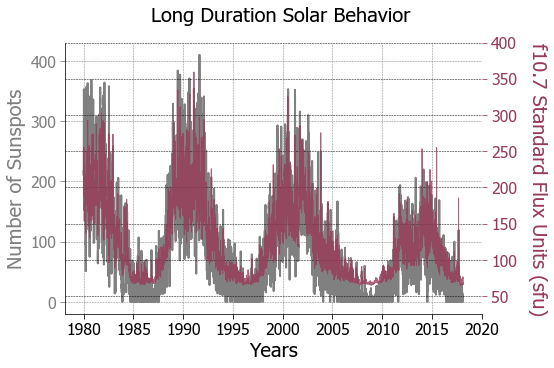

In [22]:
fig = plt.figure(figsize=(8, 5))
fig.suptitle('Long Duration Solar Behavior', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.85)

#add subplots
ax1 = fig.add_subplot(gs[0,0])


#this ties together ax1 and ax2 - 
ax2 = ax1.twinx()

#set up titles for axis
ax1.set_ylabel('Number of Sunspots', fontsize = 20, color = 'grey')
ax2.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20, 
               color = '#983b59', rotation = 270, labelpad = 30)

ax1.plot(daily_omni.index.to_pydatetime(), daily_omni['SunspotNumber'], 
         color = 'grey', lw = 2.0)

ax2.plot(daily_omni.index.to_pydatetime(), daily_omni['f10.7_index'], 
         color = '#983b59', lw = 1.0, alpha = 0.8)
    
ax1.set_xlabel('Years', fontsize = 20)

#SET UP FORMAT
ax1.xaxis.set_major_locator(mdt.YearLocator(5))
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y'))

ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params('y', colors = 'grey', labelsize = 16)
ax2.tick_params('y', colors = '#983b59', labelsize = 16)

#set label size of the x axis
ax1.tick_params('x', labelsize = 16)

#nudge it up a bit 
ax2.set_ylim([25, 400])

plt.savefig('./Figures/LongDurationSolar.png')



### What can we observe from this chart? 

## *Part C.1 - Linear Regression of Solar Cycle Data*

Given the above figure - let's now compare and constrast the two y-variables we had and instead plot 10.7 vs sunspot number - do we think this would be linear? In the last lab we performed linear regression along with the error values along this line. 

Let's repeat that analysis but add in the Pearson correlation coefficent.

In [23]:
# Since this doesn't work on nan values first we remove all potential nans.

nan_mask = ((~np.isnan(daily_omni['SunspotNumber'])) & 
           (~np.isnan(daily_omni['f10.7_index'])))

x_vals_ss_f107 = daily_omni.loc[nan_mask, 'SunspotNumber']
y_vals_ss_f107 = daily_omni.loc[nan_mask, 'f10.7_index']

#Run our linear regression
slope, intercept, rval, pval, stderr = stats.linregress(x_vals_ss_f107, y_vals_ss_f107)


#calculate the yvalues given the linear fit
y_model_sunspots_f107 = intercept + slope * x_vals_ss_f107


#find y errors
rmse  = lr.calc_rmse(y_model_sunspots_f107, y_vals_ss_f107)

#error on coefficents, slope and y-intercept and.
slope_error,  intercept_error = lr.calc_coeffs_error(x_vals_ss_f107,  rmse)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(rmse) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, intercept_error)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, slope_error) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval, rval**2))




Fit Report: 
 	Uncert. on Y: +/- 16.03
 	Intercept: 67.20 +/- 0.21
	Slope: 0.62 +/- 0.00
	Pearson linear correlation: 0.95, r-squared: 0.90


### Do we think this is linear? What does this report tell us? Note we now have an r-squared value. What does this tell us about the fit even before plotting this?

-

-

-

-

-

-

-

### Let's take a look at that fit.

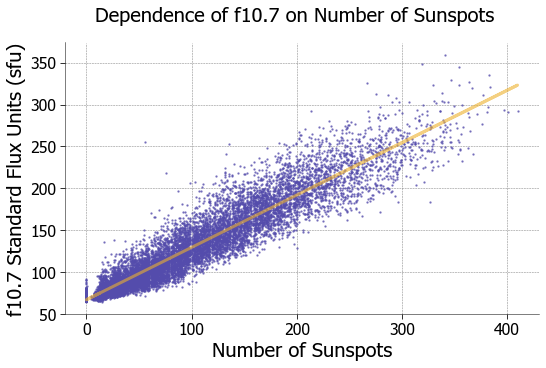

In [24]:
#Make plot of fit

fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of f10.7 on Number of Sunspots', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('Number of Sunspots', fontsize = 20)
ax1.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)

#plot values
ax1.scatter(x_vals_ss_f107, y_vals_ss_f107,  color = '#544cac', alpha = 0.6, s = 2)
ax1.plot(x_vals_ss_f107, y_model_sunspots_f107, color = '#edb12e', alpha = 0.6, lw = 3)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)



## Part C.2: Bootstrap Method

In this part of the lab we will implement the bootstrap method we learned about in Lecture 6 on Monday. 

The bootstrap method is where you repeatedly resample a dataset with replacement, i.e. you can have repeat values, to gain an estimation of error.

## Take 3 minutes to chat with a neighbor. What might be some reasons we might want to resample a dataset and do a bootstrap analysis to gain an estimation of error? Recall this is beyond just the error on the y-intercept, the root mean square error, or the slope values.

### See below for the example within the class lecture notes. 
<img src="./Images/ExampleBootstrap.png" alt="ExampleBootstrapImage" height="400px" width="350px"/>


---- 


Above we see that the number of sunspots and f10.7 are highly linear when plotted against each other and analyzed. 

### What about looking at the f10.7 and the Dst? 


Fit Report: 
 	Uncert. on Y: +/- 10.18
 	Intercept: -4.18 +/- 1.23
	Slope: -0.09 +/- 0.01
	Pearson linear correlation: -0.40, r-squared: 0.16


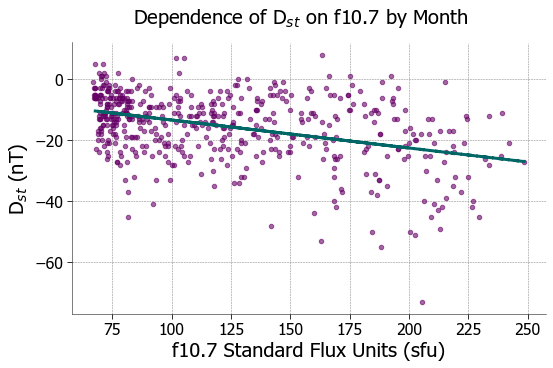

In [25]:
#since this doesn't work on nan values first we remove all potential nans' 
nan_mask = ((~np.isnan(monthly_omni['f10.7_index'])) & 
           (~np.isnan(monthly_omni['Dst'])))

x_vals = monthly_omni.loc[nan_mask, 'f10.7_index']
y_vals = monthly_omni.loc[nan_mask, 'Dst']


#calculate the linear fit
slope_orig, intercept_orig, rval_orig, pval_orig, stderr_orig = stats.linregress(x_vals, y_vals)

#calculate the yvalues given the linear fit
ymodel_orig = intercept_orig + slope_orig * x_vals


#find y errors
rmse  = lr.calc_rmse(ymodel_orig, y_vals)

#error on coefficents, slope and y-intercept and.
slope_error,  intercept_error = lr.calc_coeffs_error(x_vals,  rmse)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(rmse) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept_orig, intercept_error)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope_orig, slope_error) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval_orig, rval_orig**2))


#make plot
fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of D$_{st}$ on f10.7 by Month', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(x_vals, y_vals,  color = '#660066', alpha = 0.6, s = 20)
ax1.plot(x_vals, ymodel_orig, color = '#006666', alpha = 1.0, linestyle = '--', lw = 3)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)



### But what is the estimation on the correlation coefficent (Pearson linear correlation)? Here we need to set up our bootstrap analysis.

### Bootstrap Method:

### Step 1 - Resample our pandas dataframe.

In [26]:
#.sample is a method of dataframes - 

#the parameter frac means % of the dataframe we want in the sampling
resample = monthly_omni[['f10.7_index', 'Dst']].sample(frac=1, replace=True)


print(resample.head())


            f10.7_index  Dst
Datetime                    
1995-09-12         72.6  -24
1988-06-14        149.7  -10
2001-07-15        143.5   -2
1993-12-30        114.1  -14
1982-05-23        176.6   -8


In [27]:
#And redo the fit for our newly resampled data frame

nan_mask = ((~np.isnan(resample['f10.7_index'])) & 
           (~np.isnan(resample['Dst'])))

x_vals = resample.loc[nan_mask, 'f10.7_index']
y_vals = resample.loc[nan_mask, 'Dst']

slope, intercept, rval, pval, stderr = stats.linregress(x_vals, y_vals)

#calculate the yvalues given the linear fit
y_model = intercept + slope * x_vals


#find y errors
rmse  = lr.calc_rmse(y_model, y_vals)

#error on coefficents, slope and y-intercept and.
slope_error,  intercept_error = lr.calc_coeffs_error(x_vals,  rmse)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(rmse) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept_orig, intercept_error)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, slope_error) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval, rval**2))


Fit Report: 
 	Uncert. on Y: +/- 11.49
 	Intercept: -4.18 +/- 1.39
	Slope: -0.10 +/- 0.01
	Pearson linear correlation: -0.38, r-squared: 0.14


### Take a second and compare this to the fit you ran before...does this look a bit different or similar? Compare to your neighbor, is it the same as theirs?

-

-

-

-

-

-

-

-
### Step 2: Implementing Repetition 

Let's put this into a loop and resample for many values - 

In [28]:
# We resample and calculate the fit many times - this
# will take a while to run - be patient. 

# As suggested in class 500 would be appropiate. 
num_iterations = 500

# create dictionary of bootstrap values
bootstrap_vals = {
                  'r_vals': np.zeros(num_iterations),
                  'intercepts' : np.zeros(num_iterations),
                  'slopes' : np.zeros(num_iterations)
                  }

for i in range(num_iterations):
    
    #resample the dataframe
    resample = monthly_omni[['Dst', 
                           'f10.7_index']].sample(frac = 1, replace = True)
    
    #create nan mask
    nan_mask = ((~np.isnan(resample['f10.7_index'])) & 
               (~np.isnan(resample['Dst'])))

    #new values of x, and y without nans
    x_vals = resample.loc[nan_mask, 'f10.7_index']
    y_vals = resample.loc[nan_mask, 'Dst']

    #Perform fit.
    #Notice the underscore. 
    #This is just a placeholder for return values from our function
    # that we are not going to use. The get returned but not
    # assigned to any variable (meaning that we cannot use them,
    # but here we are saying that we don't need to use them)
    slope, intercept, rval, *_ = stats.linregress(x_vals, y_vals)
    
    # populate dictionay with the values
    bootstrap_vals['r_vals'][i] = rval
    
    bootstrap_vals['intercepts'][i] = intercept
    
    bootstrap_vals['slopes'][i] = slope

#print out final values
print("The mean r value is {:.2f} with a standard deviation of {:.5f}.".format(
    np.mean(bootstrap_vals['r_vals']), 
    np.std(bootstrap_vals['r_vals'], ddof = 1)))

The mean r value is -0.40 with a standard deviation of 0.03840.


### Step 3: Evaluation of the Fit

Now let's take a look at these values.


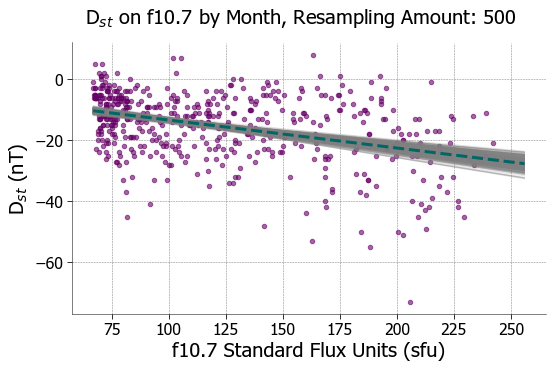

In [29]:
fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('D$_{st}$ on f10.7 by Month, ' + 
             'Resampling Amount: {} \n'.format(num_iterations), 
             fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(monthly_omni['f10.7_index'], monthly_omni['Dst'],  
            color = '#660066', alpha = 0.6, s = 20)

#make line equally spaced
minimum_value  = np.nanmin(monthly_omni['f10.7_index'])
max_value  = np.nanmax(monthly_omni['f10.7_index'])
spacing = (max_value - minimum_value) / 20.0

#create new xarray for pretty plotting
x_vals = np.arange(minimum_value, max_value+spacing, int(spacing))

for slope, intercept in zip(bootstrap_vals['slopes'], bootstrap_vals['intercepts']):
    
    #calculate y values
    y_model = slope*x_vals + intercept 
    
    #and plot in gray
    ax1.plot(x_vals, y_model, color = 'grey', alpha = 0.2, lw = 1.0)
    
#plot final value in turquoise - 
ymodel_orig = slope_orig*x_vals + intercept_orig

ax1.plot(x_vals, ymodel_orig, 
         color = '#006666', alpha = 1.0, linestyle = '--', lw = 3.0)


#set up grid
ax1.grid(color='gray', linestyle='dashed')

#set up label sizes
ax1.tick_params(labelsize = 16)

# dpi stands for dots per inch, and sets the resolution
# of the saved figure file. dpi=300 is usually 
# a good resolution for most applications.
plt.savefig('./Figures/bootstrap_linear_fits.png', dpi=300)


### Let's take a look at a distribution of these r values. 

**What does the histogram of this look like?**

The number of bins for the histogram is: 23
Skew: 0.189, Kurtosis: 2.888, Standard Dev: 0.038, Mean: -0.397


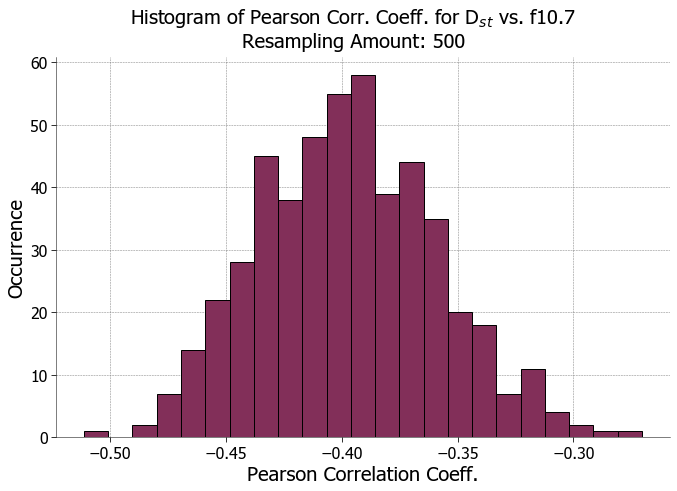

In [30]:
#set up the figure 
fig, ax = plt.subplots(figsize=(11, 7))
fig.suptitle('Histogram of Pearson Corr. Coeff. for D$_{st}$ vs. f10.7 \n' + 
             'Resampling Amount: {}'.format(num_iterations), 
             fontsize=20)


#minimum as the sqrt(sample_size)
sample_size = num_iterations


num_bins = int(np.ceil(np.sqrt(sample_size)))
print("The number of bins for the histogram is: {}".format(num_bins))

#edgecolor and linewidth set up the bin edges
ax.hist(bootstrap_vals['r_vals'], num_bins, density = False, facecolor = '#822f59', 
         edgecolor="k")

#set up grid
ax.grid(color='gray', linestyle='dashed')

#labels|
ax.set_xlabel('Pearson Correlation Coeff.', fontsize = 20)
ax.set_ylabel('Occurrence', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

#print out stats on the skew etc
print("Skew: {:.3f}, Kurtosis: {:.3f}, Standard Dev: {:.3f}, Mean: {:.3f}".format(
        stats.skew(bootstrap_vals['r_vals']), 
        stats.kurtosis(bootstrap_vals['r_vals'], fisher = False), 
        np.std(bootstrap_vals['r_vals'], ddof = 1), 
        np.mean(bootstrap_vals['r_vals'])))


### What does this chart inform you about the bootstrap analysis?


-


-


-


-


-

### Finally we calculate the z-value for this comparison - 

In [31]:
#how does the z value look?
z_val = (abs((rval_orig - np.mean(bootstrap_vals['r_vals']))) / 
        (np.std(bootstrap_vals['r_vals'], ddof = 1)))

print("The z-test results in a comparison" + 
      " of the original fit to the bootstrap fit of {:.5f}.".format(z_val))

The z-test results in a comparison of the original fit to the bootstrap fit of 0.01696.


### Is this a small or a large z-value? What does that mean about our fit? 

-

-

-

-

-

-

-

-

-



### Let's use our z-value to determine the probability that we would get the first r value by chance alone.

**There is a scipy function for that. No more tables!** (Unless you really like using tables.)

Within `scipy.stats`, there is a `t` distribution, and the `t` distribution has a probability density function. The t-test chart that you know already is based on the *cumulative* density function. The cell below shows its usage.

In [32]:
p = stats.t.cdf(x=z_val, df=1e6)
print(p)

0.5067665053572697


### How do we interpret this probability?

.

.

.

### Why did we set df equal to a million?

.

.

.

.

# In lab Activity
## Practice using the bootstrap method.

#### Now we will use the bootstrap method to calculate the 'best' r, and its uncertainty for the linear correlation between sunspot number and F10.7 

In [ ]:
# Like before:
num_iterations = ??

# create dictionary of bootstrap values
bootstrap_vals = {
                  'r_vals': np.zeros(num_iterations),
                  'intercepts' : np.zeros(num_iterations),
                  'slopes' : np.zeros(num_iterations)
                  }

for i in range(num_iterations):

    #resample the dataframe using SunspotNumber and f10.7_index columns
    resample = daily_omni[??].sample(frac=?, replace=?)
    
    #create nan mask    
    nan_mask = ??
    
    
    #new values of x, and y without nans
    x_vals = ?? # sunspot numbers for x
    y_vals = ?? # f10.7 for y


    #Perform fit. What is *_ ?
    slope, intercept, rval, *_ = ??
    
    # populate dictionay with the values
    bootstrap_vals['r_vals'][?] = ??
    
    bootstrap_vals['intercepts'][?] = ??
    
    bootstrap_vals['slopes'][?] = ??

#print out final values
print("The mean r value is {:.5f} with a standard deviation of {:.5f}.".format(
    np.mean(bootstrap_vals['r_vals']), 
    np.std(bootstrap_vals['r_vals'], ddof = 1)))

**Make a figure, similar to before showing all of our calculated lines.**

In [ ]:
# Code here for plotting...




















# SUMMARY
In this lab we have learned a little bit about space weather data, how to calculate the correlation coefficient (r), and how to use a bootstrap method to calculate an uncertainty on r.


## *Bonus - Time Saving for Plotting*

### What if we wanted to implement this onto *any* dataset without copy paste? Let's learn some time saving tools here. 

If you just want to run forward with some quick exploratory plots - I reccomend Seaborn. Please note it's difficult to obtain finalized plots in seaborn with what we've learned so far but I support using these quick look tools


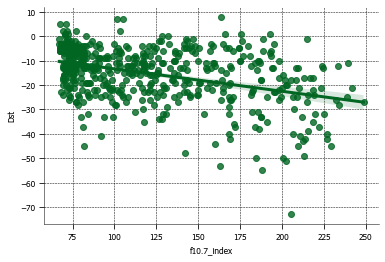

In [33]:
import seaborn as sns #this is a new package here
                      #I like to think of this as a stats + visualization package
    
#makes a quick plot AND linear fit
#runs nicely with pandas dataframes
sns.regplot(x = 'f10.7_index', y = 'Dst', data = monthly_omni, n_boot = 1000);

#note the confidence interval drawn around the dataset 
#dependent on the bootstrap via n_boot

### You can also get the same "seaborn style" with some nifty visualization tricks...such as...

The following styles are availible:
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


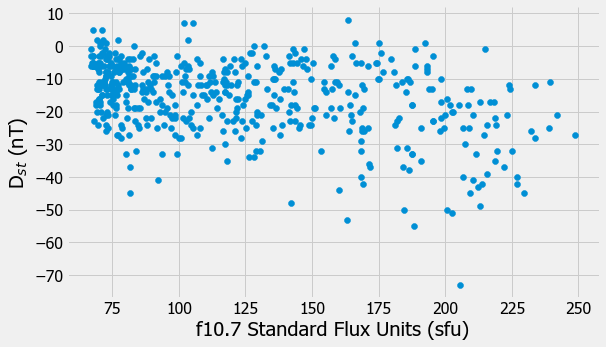

In [34]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
    
fig, ax = plt.subplots(figsize=(8.5, 5))

#set up titles for axis
ax.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
x_vals = monthly_omni['f10.7_index']
y_vals = monthly_omni['Dst']
ax.scatter(x_vals, y_vals)


ax.tick_params(labelsize = 16)


print("The following styles are availible:")
print(plt.style.available)

### The great thing about these is that you can use some of the defaults to set fontsizes etc, each time you plot!

You can find more about this here - https://matplotlib.org/tutorials/introductory/customizing.html



